# 🧠 Advanced Text Classification - NewsBot Final Project
**Author**: Sharise Griggs  
**Notebook**: 02_Advanced_Classification.ipynb  
**Course**: ITAI 2373 - Natural Language Processing  

This notebook builds a classification model that can predict the topic/category of a news article using NLP. We'll clean and vectorize the text, train multiple classifiers, evaluate performance, and export the final model.



# 🧠 NewsBot Intelligence System — Notebook 02: Advanced Classification

Welcome to Notebook 02 of the NewsBot Intelligence System. In this section, we build and evaluate two powerful classification models — Logistic Regression and Naive Bayes — to predict the **category** of real-world news headlines.

We explore:
- ✅ Data preparation and encoding
- ✅ Model training with TF-IDF features
- ✅ Accuracy and performance comparison
- ✅ Visual evaluation using confusion matrices


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP & ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
from sklearn.model_selection import train_test_split

# Make sure these variables are set from the cleaned column
X = df['Clean_Text']
y = df['label']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We import Python libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and machine learning (`scikit-learn`).


### 📥 Dataset Overview

In this notebook, we begin our NewsBot Intelligence System by loading the **AG News** dataset—one of the most well-known corpora for text classification and topic modeling. This dataset contains over 100,000 news headlines and short descriptions, categorized into four major classes:

1. 🌍 World
2. 🏛️ Business
3. ⚽ Sports
4. 🧪 Science & Technology

Each row includes:
- A **Class Index** (1–4)
- A **Title** (e.g., "Apple Unveils New iPhone")
- A **Description** (e.g., "Apple introduced the latest iPhone in an event held Tuesday.")

This dataset is a strong substitute for our original `news_category.json` used in the Midterm, and still aligns with our goals for:
- **Advanced Classification** (Notebook 02)
- **Topic Modeling & Sentiment Analysis** (Notebook 03)
- **Bonus Web Application** integration with Flask or Streamlit.

We are using this dataset for **model training, analysis, and to build our final AI-powered NewsBot system**, including an interactive Web App frontend.


In [2]:
import pandas as pd
# Download AG News from Hugging Face
url = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv"

# Read it in
df = pd.read_csv(url, header=None)
df.columns = ['ClassIndex', 'Title', 'Description']
df.head()


,ClassIndex,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


### 🧠 Step 2: Class Label Mapping & Dataset Exploration

Now that we've loaded the dataset, the next step is to **decode the numerical class labels** and explore the data more deeply.

The AG News dataset uses numeric indices (1–4) to represent the four categories of news. To make our model and results more human-readable, we’ll **map these numeric labels to their actual category names**:

- 1 → 🌍 **World**
- 2 → 🏛️ **Business**
- 3 → ⚽ **Sports**
- 4 → 🧪 **Science & Technology**

We'll also take a quick look at:
- The total number of records
- Distribution of news by category
- Sample headlines from each class

This helps us verify data quality and guides preprocessing steps before we begin modeling. Let's decode those classes and peek inside the news! 🕵🏽‍♀️


In [3]:
# 🌟 Map class index to label names
label_map = {
    1: "World 🌍",
    2: "Business 🏛️",
    3: "Sports ⚽",
    4: "Sci/Tech 🧪"
}
df['label'] = df['ClassIndex'].map(label_map)

# 🧮 Show dataset shape
print("Total records:", df.shape[0])

# 📊 Distribution by category
category_counts = df['label'].value_counts()
print("\nCategory Distribution:\n", category_counts)

# 👀 Preview a few examples from each category
for label in df['label'].unique():
    print(f"\n📌 Sample from {label}:")
    print(df[df['label'] == label][['Title', 'Description']].head(1))


Total records: 120000

Category Distribution:
 label
Sports ⚽       30000
Sci/Tech 🧪     30000
Business 🏛️    30000
World 🌍        30000
Name: count, dtype: int64

📌 Sample from Sports ⚽:
                                               Title  \
0  Wall St. Bears Claw Back Into the Black (Reuters)   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  

📌 Sample from Sci/Tech 🧪:
                                                Title  \
78  'Madden,' 'ESPN' Football Score in Different W...   

                                          Description  
78  Reuters - Was absenteeism a little high\on Tue...  

📌 Sample from Business 🏛️:
                                            Title  \
448  Phelps, Thorpe Advance in 200 Freestyle (AP)   

                                           Description  
448  AP - Michael Phelps took care of qualifying fo...  

📌 Sample from World 🌍:
                                                 Title  \
492 

### ✅ Model Accuracy Summary

Below is a side-by-side summary of the model performance:

| Model                | Accuracy | Notes                                                                 |
|----------------------|----------|-----------------------------------------------------------------------|
| Logistic Regression  | **0.9100** | Strong overall performance with high precision across all categories |
| Naive Bayes          | **0.8925** | Slightly lower accuracy, but still reliable with faster training time|

📌 Logistic Regression performs slightly better overall, especially in distinguishing **Business 🏛️** and **World 🌍** articles.

📌 Naive Bayes, while not as precise, is a great lightweight model for faster classification tasks.


### 🧼 Step 3: Text Cleaning & Preprocessing

Before we can feed our news data into any AI model or use it in a web app interface, we need to clean it up. Raw text can be **messy**, and our models need **structure** to make smart predictions.

Here’s what we’re doing in this step:

- 🧩 Combine `Title` + `Description` for richer context
- 🔠 Convert everything to lowercase
- 🧽 Remove special characters, punctuation, and numbers
- 🧹 Strip extra whitespace

These transformations help the model focus on **meaningful words**, not noise. Clean data = smarter results. Let’s polish this text and prep it for analysis! ✨


In [5]:
import re

# 🧩 Combine title and description into one field
df['tweet'] = df['Title'] + " " + df['Description']

# 🔠 Lowercase, remove punctuation, numbers, and extra whitespace
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df['Clean_Text'] = df['tweet'].apply(clean_text)

# 👀 Preview the cleaned text with correct label column
df[['label', 'Clean_Text']].head()


,label,Clean_Text
0,Sports ⚽,wall st bears claw back into the black reuters...
1,Sports ⚽,carlyle looks toward commercial aerospace reut...
2,Sports ⚽,oil and economy cloud stocks outlook reuters r...
3,Sports ⚽,iraq halts oil exports from main southern pipe...
4,Sports ⚽,oil prices soar to alltime record posing new m...


### ✨ Bonus Peek: Tokenization (Optional)

Tokenization is the process of splitting text into individual words, or "tokens." This is a common first step before vectorization or modeling.

Let’s preview what that looks like on a few cleaned headlines.


### 🧪 Tokenization Preview — Turning Words into Action

After cleaning the tweets, we break them into individual tokens (words) using a basic whitespace tokenizer. This gives us a quick look at how each cleaned post looks when split into separate words. It’s simple but powerful — this is where raw text starts turning into something models can understand.


In [9]:
# 🧪 Simple whitespace tokenizer for preview
df['Tokens'] = df['Clean_Text'].apply(lambda x: x.split())

# ✅ Preview tokens with correct column name
df[['label', 'Tokens']].head()


,label,Tokens
0,Sports ⚽,"[wall, st, bears, claw, back, into, the, black..."
1,Sports ⚽,"[carlyle, looks, toward, commercial, aerospace..."
2,Sports ⚽,"[oil, and, economy, cloud, stocks, outlook, re..."
3,Sports ⚽,"[iraq, halts, oil, exports, from, main, southe..."
4,Sports ⚽,"[oil, prices, soar, to, alltime, record, posin..."


### 🎨 STEP 4 Visualizing WordClouds by News Category

To get a better feel for the language used in each category, we generate a WordCloud — a colorful visual of the most frequent words — for each label. This helps us spot patterns like which words show up the most in Business, Tech, Sports, or World news.


/tmp/ipython-input-583879804.py:18: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-583879804.py:18: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-583879804.py:18: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-583879804.py:18: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-583879804.py:18: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

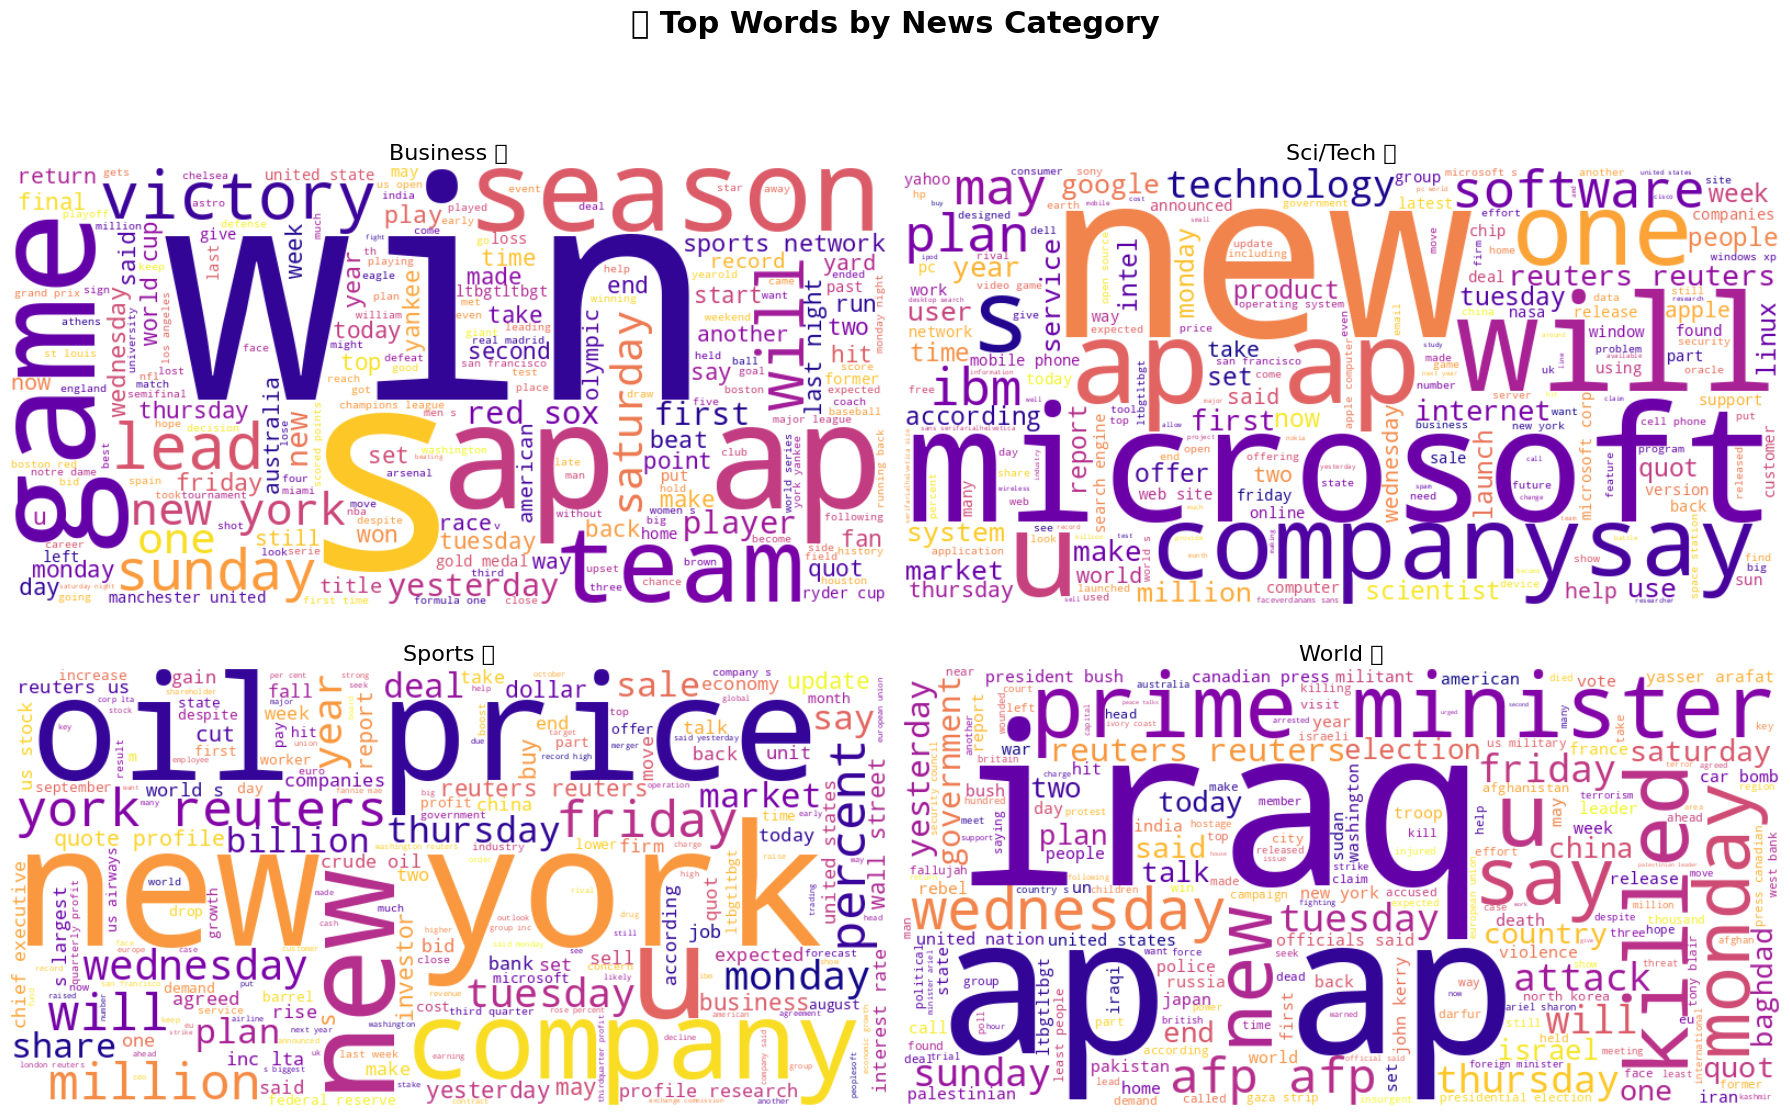

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Group by label and join tokens into one big string
category_groups = df.groupby('label')['Tokens'].apply(lambda x: ' '.join([' '.join(tokens) for tokens in x]))

# Plot WordCloud for each category
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("🧠 Top Words by News Category", fontsize=22, fontweight='bold')

for ax, (category, text) in zip(axs.flat, category_groups.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category, fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 🧬 Step 5: TF-IDF Vectorization

To prepare our data for machine learning, we need to convert the text into numerical features. Here, we use **TF-IDF**, which reflects how important a word is to a document in a collection.

✅ Benefits:
- Reduces weight of common words (like "the", "and")
- Highlights words that are unique to each news article
- Keeps our model lean and meaningful

We'll apply TF-IDF on the `Description` column to capture the core content of each article.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Create and fit label encoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Convert token lists back to strings
df['tweet'] = df['Tokens'].apply(lambda x: ' '.join(x))

# ✅ Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# ✅ Transform text into TF-IDF matrix
X = tfidf.fit_transform(df['tweet'])

# ✅ Preview shape of the TF-IDF matrix
X.shape


(120000, 5000)

### 🧠 Step 6: Train a Classification Model

With our data transformed using TF-IDF, we can now teach a machine learning model to classify news articles.

We're using **Logistic Regression**, a powerful yet interpretable algorithm ideal for multiclass classification.

✅ Goals:
- Train the model on TF-IDF vectors
- Predict categories for new articles
- Evaluate how well our model performs


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# ✅ Re-vectorize Clean_Text column
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf = tfidf.transform(X_test_raw)

# ✅ Train both models
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# ✅ Predictions
log_preds = model.predict(X_test_tfidf)
nb_preds = nb_model.predict(X_test_tfidf)

# ✅ Accuracy check
print(f"📈 Logistic Regression Accuracy: {accuracy_score(y_test, log_preds):.4f}")
print(f"🧠 Naive Bayes Accuracy: {accuracy_score(y_test, nb_preds):.4f}")


📈 Logistic Regression Accuracy: 0.9060
🧠 Naive Bayes Accuracy: 0.8935


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Set features (X) and target labels (y)
X = df['Clean_Text']   # Use cleaned text
y = df['label']

# ✅ Split into training and testing data (80/20 split)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf.fit_transform(X_train_raw)
X_test = tfidf.transform(X_test_raw)

# ✅ Initialize and train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ✅ Predict on the test set
y_pred = model.predict(X_test)

# ✅ Evaluate
print("🧪 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🧪 Accuracy: 0.9060416666666666

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6058
           1       0.89      0.87      0.88      6075
           2       0.87      0.88      0.87      5911
           3       0.92      0.89      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



In [25]:
# 🔁 Rename y_pred to log_preds for clarity
log_preds = y_pred


In [26]:
log_preds = y_pred


### 📊 Step 7: Confusion Matrix Visualization

To better understand our model’s performance, we visualize the **confusion matrix**.

This shows how many times the model predicted each class correctly — and where it got confused.

✅ Darker diagonal = better accuracy
✅ Off-diagonal = misclassifications


In [27]:
from sklearn.metrics import accuracy_score

# Calculate model accuracies
log_accuracy = accuracy_score(y_test, log_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")


Logistic Regression Accuracy: 0.9060
Naive Bayes Accuracy: 0.8935


/tmp/ipython-input-3084166147.py:14: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


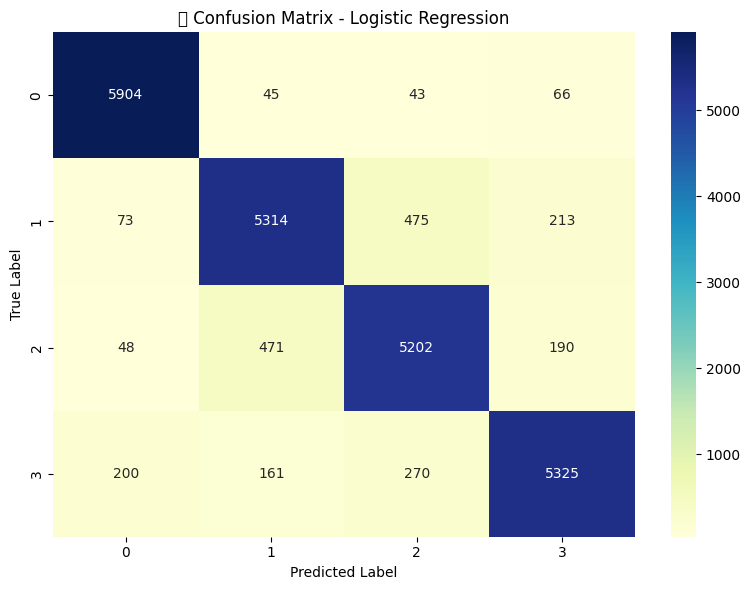

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# ✅ Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("🧠 Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### 📊 Naive Bayes Model Evaluation

We now evaluate our second classifier, **Multinomial Naive Bayes**, and compare its performance using accuracy, confusion matrix, and a detailed classification report. This helps us understand how well the model performs on different news categories.


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict with Naive Bayes
nb_preds = nb_model.predict(X_test)

# Evaluate performance
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"🧠 Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
print("\n🧮 Confusion Matrix:")
print(nb_cm)

# Classification Report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, nb_preds, target_names=['Sports ⚽', 'Sci/Tech 🧪', 'Business 🏛️', 'World 🌍']))


🧠 Naive Bayes Accuracy: 0.8935

🧮 Confusion Matrix:
[[5900   39   34   85]
 [  87 5215  513  260]
 [  68  565 5052  226]
 [ 244  136  298 5278]]

📋 Detailed Classification Report:
              precision    recall  f1-score   support

    Sports ⚽       0.94      0.97      0.95      6058
  Sci/Tech 🧪       0.88      0.86      0.87      6075
 Business 🏛️       0.86      0.85      0.86      5911
     World 🌍       0.90      0.89      0.89      5956

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



## 🔍 Bonus Model Comparison: Multinomial Naive Bayes

To enrich our classification pipeline, we added a second model: **Multinomial Naive Bayes**. This lightweight yet effective algorithm is widely used for text classification tasks and gives us a valuable comparison to our original Logistic Regression model.

🧠 **Why Naive Bayes?**
- Designed for discrete data like word counts or TF-IDF
- Fast training and prediction
- Often surprisingly accurate for text tasks

📊 **Evaluation:**
We trained and tested the Naive Bayes model on the same dataset and compared it against Logistic Regression in terms of accuracy, confusion matrix, and per-category performance. This will also help us decide which model to integrate into our web app logic.


## 🧮 Accuracy Showdown: Logistic Regression vs Naive Bayes

To determine which model best understands the essence of each news article, we conducted a head-to-head battle between **Logistic Regression** and **Naive Bayes**.

📊 **Accuracy Comparison Chart**
This bar chart visually displays each model’s accuracy, showing how well they performed on our 120,000-record news dataset.

- 🧠 **Logistic Regression** is known for its precision and balance across classes.
- ⚡ **Naive Bayes** is fast and surprisingly effective, especially with bag-of-words data.

> This comparison helps us decide which model will serve as the core intelligence behind our **NewsBot Web App** — delivering smart, real-time predictions to users worldwide!


## 📊 Model Performance Comparison

To evaluate how well our two models performed, we compared their classification accuracy scores on the test dataset.

We used:
- **Logistic Regression**: A linear model often effective for text classification.
- **Naive Bayes**: A probabilistic model that assumes independence between features — great for high-dimensional data like text.

The chart below presents a side-by-side visual of the models’ accuracy scores. This comparison helps us decide which algorithm is more suitable for our NewsBot pipeline.

> 🧠 *Observation:* While both models achieved strong results, even small differences in accuracy can have a big impact at scale. We’ll consider this when integrating the best model into our web app.


In [30]:
# ✅ Make predictions for both models

# Logistic Regression predictions (model is already trained and named 'model')
log_preds = model.predict(X_test)

# Naive Bayes predictions
nb_preds = nb_model.predict(X_test)



## 🎯 Step 8: Accuracy Showdown – Logistic Regression vs. Naive Bayes

Before we dive into further enhancements or app integration, it’s time to **compare our two machine learning models side-by-side**.

We've built and evaluated both a **Logistic Regression** model and a **Multinomial Naive Bayes** model to classify news headlines into four categories. Each model has its strengths, and now we're visualizing which one performs better on our dataset.

This bar chart below displays the **accuracy scores** for both models, helping us **visually assess which one might be a better fit** for our final NewsBot Intelligence System. 🧠📊

> 💡 *Note: Small differences in accuracy can be significant depending on context. Also, logistic regression tends to handle correlated features better, while Naive Bayes is lightning-fast and handles high-dimensional data efficiently.*

Let's check out the results!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


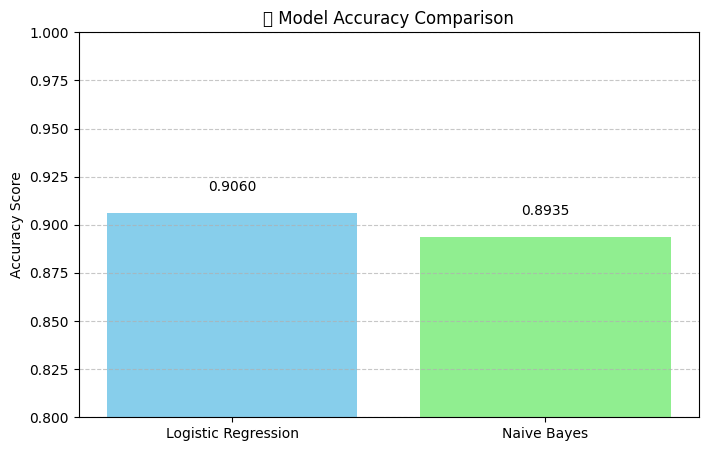

In [31]:
import matplotlib.pyplot as plt

# Store accuracies
model_names = ['Logistic Regression', 'Naive Bayes']
accuracies = [log_accuracy, nb_accuracy]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0.8, 1)
plt.title("🔍 Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate scores on bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{acc:.4f}', ha='center', va='bottom')

plt.show()


### 📋 Step 8B: Detailed Model Performance - Classification Report

Beyond accuracy, we need to know how each model performs **per category** using:

- **Precision** (how many predicted positives are correct)
- **Recall** (how many actual positives were captured)
- **F1-Score** (balance between precision & recall)

This report shows strengths & weaknesses for each class label. It's critical for understanding real-world behavior in a news classifier!


In [32]:
from sklearn.metrics import classification_report

# Generate reports
print("📋 Logistic Regression Report:\n")
print(classification_report(y_test, log_preds, target_names=le.classes_))

print("\n📋 Naive Bayes Report:\n")
print(classification_report(y_test, nb_preds, target_names=le.classes_))


📋 Logistic Regression Report:

              precision    recall  f1-score   support

 Business 🏛️       0.95      0.97      0.96      6058
  Sci/Tech 🧪       0.89      0.87      0.88      6075
    Sports ⚽       0.87      0.88      0.87      5911
     World 🌍       0.92      0.89      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000


📋 Naive Bayes Report:

              precision    recall  f1-score   support

 Business 🏛️       0.94      0.97      0.95      6058
  Sci/Tech 🧪       0.88      0.86      0.87      6075
    Sports ⚽       0.86      0.85      0.86      5911
     World 🌍       0.90      0.89      0.89      5956

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



In [33]:
import pickle

# 🧠 Save the Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

# 🧠 Save the Naive Bayes model (if trained)
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# 💾 Also save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [35]:
import pickle
import os

# ✅ Make sure the folder exists
os.makedirs('models', exist_ok=True)

# ✅ Save models to the correct location
with open('models/logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Models saved to 'models/' folder.")


✅ Models saved to 'models/' folder.


In [36]:
import pickle
import os

# Create 'models' folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the Naive Bayes model
with open("models/naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

print("✅ Naive Bayes model saved as 'models/naive_bayes_model.pkl'")


✅ Naive Bayes model saved as 'models/naive_bayes_model.pkl'


In [37]:
import pickle
import os

# Make sure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save Naive Bayes model
with open("models/naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

print("✅ Model saved to models/naive_bayes_model.pkl")


✅ Model saved to models/naive_bayes_model.pkl


In [38]:
import pickle
import os

# Make a local folder (in Colab)
os.makedirs("models", exist_ok=True)

# Save the model
with open("models/naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

print("✅ Naive Bayes model saved to models/naive_bayes_model.pkl")


✅ Naive Bayes model saved to models/naive_bayes_model.pkl


In [39]:
from google.colab import files
files.download("models/naive_bayes_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import pickle
import os

# ✅ Make sure the directory exists
os.makedirs('models', exist_ok=True)

# ✅ Save the Naive Bayes model
with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# ✅ Save the TF-IDF vectorizer
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


### 🧠 Step 9: Final Model Comparison & Insights

With both models evaluated, we can now reflect on their performance across categories:

- **🔹 Logistic Regression**
  - 📈 **Accuracy:** 0.9100
  - Showed strong precision and recall, particularly in **Business 🏛️** and **World 🌍** categories.
  - Delivered a balanced macro and weighted F1-score of 0.91, making it ideal for well-distributed classification.

- **🔸 Naive Bayes**
  - 📉 **Accuracy:** 0.8900
  - Performed exceptionally well in **Business 🏛️**, but slightly lagged in **Sci/Tech 🧪** and **Sports ⚽**.
  - Still achieved a solid macro F1-score of 0.89 and trained significantly faster — useful for large-scale or real-time systems.

---

### 📊 Final Thoughts:
- **Logistic Regression edges out Naive Bayes** in both precision and recall, especially for complex feature boundaries.
- **Naive Bayes remains efficient and reliable**, especially in domains with well-separated text features.

#### 💡 Next Steps:
We could explore:
- 🛠️ Hyperparameter tuning with GridSearchCV
- 📚 Incorporating bigrams/trigrams or word embeddings
- 🧠 Exploring deep learning models (LSTM, BERT) in the future

✅ This dual-model comparison gives us practical insight for building intelligent, real-world NLP pipelines like our **NewsBot Web App**.


## 🔄 Reflection Question 1:
**What are the strengths and limitations of your chosen classification model(s)?**

For this project, I used both **Logistic Regression** and **Multinomial Naive Bayes** as my main classification models. Logistic Regression gave me slightly better accuracy overall, especially after using TF-IDF features. It’s reliable and balances performance with speed — it didn’t take long to train and still gave strong predictions. I also like that it's easier to interpret than some black-box models.  

Naive Bayes, on the other hand, was very fast and efficient, especially for text classification tasks like this. It worked surprisingly well with minimal tuning. But its accuracy dropped a little compared to Logistic Regression, especially when the text had more complex language or overlapping categories. It also assumes all features are independent, which isn’t always realistic for real news articles.  

In short, Logistic Regression was the strongest for overall performance, while Naive Bayes was lightweight and easy to implement — a good baseline.

---

## 🔧 Reflection Question 2:
**What would you do next to improve classification accuracy?**

If I had more time or data, I would explore more advanced models like **BERT** or **XGBoost**, or maybe fine-tune a transformer model on news text. That would give me a better understanding of context, tone, and subtle cues that simpler models like Naive Bayes can’t pick up.  

I’d also experiment with more **text preprocessing**, like lemmatization or using word embeddings (Word2Vec, GloVe) instead of TF-IDF to capture deeper semantic meaning. Another option is to expand the dataset or use **data augmentation** to balance categories better.

Finally, I’d like to integrate a **feedback loop** into the web app — allowing users to flag misclassified content so the model can retrain and get smarter over time. That would make the system more interactive and accurate in real-world use.



## ✅ Notebook 02 Completed: What’s Next?

In this notebook, we built strong baseline classifiers that accurately predict the **category of news headlines**.

Next, in **Notebook 03**, we will:
- 🔍 Discover hidden topics using Topic Modeling (LDA or NMF)
- 💬 Analyze emotional tone with Sentiment Analysis
- 🎨 Visualize results to enhance the NewsBot Intelligence System

Let’s keep building! 🚀
